# Introduction sur scikit-learn (sklearn)

Ce cahier jupyter démontre certaines fonctions les plus utiles de la bibliothéque scikit-learn
Ce que nous allons couvrir : 

0. Un workflow scikit-learn de bout en bout
1. Préparation des données
2. Choix d'une bonne estimation/algorithme adapté à notre problème
3. Ajuster le modèle/algorithm et utiliser pour prédire
4. Évaluer le modèle
5. Améliorer le modèle
6. Sauvegarder le modèle
7. Mettre tout ensemble

In [1]:
nous_allons_voir = [
    "0. Un workflow scikit-learn de bout en bout",
    "1. Préparation des données",
    "2. Choix d'une bonne estimation/algorithme adapté à notre problème",
    "3. Ajuster le modèle/algorithme et utiliser pour prédire",
    "4. Évaluer le modèle",
    "5. Améliorer le modèle",
    "6. Sauvegarder le modèle",
    "7. Mettre tout ensemble"
]

In [2]:
# Standard imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 0. Un workflow scikit-learn de bout en bout

In [3]:
 # 1. Préparation des données 
import pandas as pd
heart_disease = pd.read_csv('./data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# On crée la matrice des caractéristiques X
X = heart_disease.drop("target", axis=1)

# Matrice de toutes les caractéristiques sur Y

y = heart_disease["target"]

In [5]:
# 2. Choisir le bon modèle  et les hyperparamètres (un paramètre dont la valeur est utilisée pour 
# contrôler le processus d'apprentissage.)
# Les hyperparamètres sont des paramètres réglables qui vous permettent de contrôler le processus 
# d'entraînement du modèle.

from sklearn.ensemble import RandomForestClassifier 
# Modèle Ml de classification donc capable d'apprendre des modèles de données et de déterminer 
# si une rangée est un élément de l'échantillon

# On instancie cette classe 
clf = RandomForestClassifier()

# On garde les paramètres par défaut des hyperparamètres

clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Ajuster le modèle aux données de traitement et faire une prédiction

# Nous devons diviser nos données en données d'entrainement et en données de test
from sklearn.model_selection import train_test_split
# 80% des données seront pour l'entrainement et  les 20% pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  


In [7]:
clf.fit(X_train, y_train);

In [8]:
# Étiquettes de prédiction
y_preds = clf.predict(X_test)
y_preds 

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1])

In [9]:
 y_test

118    1
183    0
73     1
264    0
157    1
      ..
83     1
87     1
175    0
169    0
121    1
Name: target, Length: 61, dtype: int64

In [10]:
# 4. Évaluons le modèle (Nous allons évaluer la qualité des prédictions ou l'efficacité du modèle ML)
# sur les données d'entrainement
clf.score(X_train, y_train)

1.0

In [11]:
clf.score(X_test, y_test)

0.8360655737704918

In [12]:
#  Il y a plusieurs méthodes d'évaluation 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Cela vas retourner  des métriques de classification qui comparent nos étiquettes de test à nos prédictions
print(classification_report(y_test, y_preds)) # Vérifier que les étiquettes sont de vraies étiquettes par rapport à nos prédictions

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [13]:
#  matrice de confusion, appelée également matrice d'erreur, 
# est un tableau qui présente différentes prévisions et résultats de tests, 
# en les comparant avec des valeurs réelles.
#  matrice qui mesure la qualité d'un système de classification.
confusion_matrix(y_test,  y_preds)

array([[22,  6],
       [ 4, 29]])

In [14]:
accuracy_score(y_test,y_preds)

0.8360655737704918

In [15]:
# 5. Amélioration du modèle
#essayez différentes quantités de n_estimators qui est l'un des hyperparamètres  que nous pouvons ajuster pour améliorer le modèle
np.random.seed(42)
for i in range (10, 100, 10):
    print(f"Entrainement du modéle avec {i} estimateurs ")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)  #on instancie un modèle de classification de forêt aléatoire
    print(f"Précision du modèle dans les données du test {clf.score(X_test, y_test) * 100 : .3f} %")
    print(" ")

Entrainement du modéle avec 10 estimateurs 
Précision du modèle dans les données du test  73.770 %
 
Entrainement du modéle avec 20 estimateurs 
Précision du modèle dans les données du test  83.607 %
 
Entrainement du modéle avec 30 estimateurs 
Précision du modèle dans les données du test  75.410 %
 
Entrainement du modéle avec 40 estimateurs 
Précision du modèle dans les données du test  80.328 %
 
Entrainement du modéle avec 50 estimateurs 
Précision du modèle dans les données du test  80.328 %
 
Entrainement du modéle avec 60 estimateurs 
Précision du modèle dans les données du test  78.689 %
 
Entrainement du modéle avec 70 estimateurs 
Précision du modèle dans les données du test  78.689 %
 
Entrainement du modéle avec 80 estimateurs 
Précision du modèle dans les données du test  81.967 %
 
Entrainement du modéle avec 90 estimateurs 
Précision du modèle dans les données du test  81.967 %
 


In [16]:
# 6. Enregistrer un modèle et le Charger

import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))


In [17]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.819672131147541

## 1.Préparons les données pour qu'ils soient prêt à être utilisé en ML

Trois choses que nous devons absolument faire sont :

    1. Diviser les données en caractéristiques (features) et en étiquettes (labels) (généralement x et y)
    2. Remplissage (imputation) : le fait de ne pas tenir compte des valeurs manquantes
    3. Conversion des valeurs non numériques en valeurs numériques (Encodage de caractéristiques)
 

In [18]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [20]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [21]:
# Divisons les données en données d'entrainement et de test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [23]:
len(heart_disease)

303

## 1.1 S'assurrer que tous les données que nous avons sont numériques

In [24]:
car_sales = pd.read_csv("./data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [25]:
len(car_sales)

1000

In [26]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [27]:
# Split the data into X/y

X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into train/test set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [28]:
# Build ML model 
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

#model.fit(X_train, y_train)
#model.score(X_test, y_test)


In [29]:
# Transformer le champ categorie en chiffres

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


categorical_features = ["Make", "Colour","Doors"]  #Caractéristiques catégorielles
one_hot = OneHotEncoder() #On instancie un encodeur

# On crée un transformateur et on  applique l'encodeur aux caractéristiques catégorielles
# Et pour les colones restantes (ici Odometer), ne rien faire (remainder="passthrough")
 
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X) # On adapte notre transformateur en transformant nos données X
transformed_X

    

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [30]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [31]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [32]:
# Réajustons le modèle
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model.fit(X_train, y_train)


RandomForestRegressor()

In [33]:
#Évaluons le modèle

model.score(X_test, y_test)

0.3235867221569877

### 1.2 Et si l'on rencontrais des valeurs manquantes dans nos données ?

    1. Remplir avec une certaine valeur (aussi appelé imputation)
    2. Supprimer complétement les données avec des valeurs manquantes

In [34]:
# Importons les données manquantes
car_sales_missing = pd.read_csv('./data/car-sales-extended-missing-data.csv')
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [35]:
 car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [36]:
# Créons X et y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]


### Option 1 : Remplir les données manquantes avec Pandas

In [37]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [38]:
# Remplissons les valeurs manquantes

car_sales_missing["Make"].fillna("missing", inplace=True)
car_sales_missing["Colour"].fillna("missing", inplace=True)

#les valeurs manquantes par la moyenne des valeurs
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean, inplace=True)

car_sales_missing["Doors"].fillna(4, inplace=True)

In [39]:
# Vérifions encore notre cadre de données
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [40]:
# On essaye de prédire ici le prix d'une voiture, or nous avons dans notre dataset 50 valeurs nulles
# Nous allons donc supprimés toutes les lignes dont la colonne Price n'a pas de valeur

car_sales_missing.dropna(inplace=True)

In [41]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [42]:
len(car_sales_missing)

950

In [43]:
# On redivise nos données

X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [44]:
# Nous allons transformer nos données

# Transformer le champ categorie en chiffres

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


categorical_features = ["Make", "Colour","Doors"]  #Caractéristiques catégorielles
one_hot = OneHotEncoder() #On instancie un encodeur

# On crée un transformateur et on  applique l'encodeur aux caractéristiques catégorielles
# Et pour les colones restantes (ici Odometer), ne rien faire (remainder="passthrough")
 
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing) # On adapte notre transformateur en transformant nos données X
transformed_X


array([[0.0, 1.0, 0.0, ..., 0.0, 35431.0, 15323.0],
       [1.0, 0.0, 0.0, ..., 1.0, 192714.0, 19943.0],
       [0.0, 1.0, 0.0, ..., 0.0, 84714.0, 28343.0],
       ...,
       [0.0, 0.0, 1.0, ..., 0.0, 66604.0, 31570.0],
       [0.0, 1.0, 0.0, ..., 0.0, 215883.0, 4001.0],
       [0.0, 0.0, 0.0, ..., 0.0, 248360.0, 12732.0]], dtype=object)

### Option 2 : Remplir les données manquantes avec scikit learn


In [45]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [46]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [47]:
# Divisons les données en sous-ensembles
# Nous allons d'abord nous débarrasser des lignes qui n'ont pas de valeurs de prix ("Price"), puis
# nous allons le diviser en X et y car nous ne voulons pas traiter des données qui n'ont pas d'étiquettes

car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [48]:
# Diviser en X et y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [49]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [50]:
# Remplissons les données manquantes avec scikit-learn

# Imputation (remplir les données manquantes par une certaine valeur)
from sklearn.impute import SimpleImputer
# Notre transformateur
from sklearn.compose import ColumnTransformer

# Remplissons les données catégorielles avec 'missing' & les valeurs numériques avec la moyenne (mean)

cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Définissons les colonnes ou les caractéristiques catégorielles

cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Créeons et imputons (quelque chose qui remplira nos données manquantes)
# Imputation = trouver une donnée manquante et la remplacer par qq chose

imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("doors_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transformons une fois de plus les données afin qu'elles deviennent données de base
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [51]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [52]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [53]:
# Nous allons transformer nos données

# Transformer le champ categorie en chiffres

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


categorical_features = ["Make", "Colour","Doors"]  #Caractéristiques catégorielles
one_hot = OneHotEncoder() #On instancie un encodeur

# On crée un transformateur et on  applique l'encodeur aux caractéristiques catégorielles
# Et pour les colones restantes (ici Odometer), ne rien faire (remainder="passthrough")
 
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled) # On adapte notre transformateur en transformant nos données X
transformed_X


<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [54]:
# Nous avons à présent un dataset constitué que de chiffres avec aucune valeur manquante
# Now, on vas mettre en place un modéle

np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

In [55]:
len(car_sales_filled)

950

## 2. Choisissons le bon estimateur/modèle/algorithme adapté à notre modèle

Scikit-Learn utilise le terme estimateur pour désigner celui de modèle ou d'algorithme d'apprentissage automatique

* Classification : prédire qu'un échantillon est une chose ou une autre
* Régression : prédire un nombre

Step 1 : Vérifier la Carte(Map) des modèles de scikit-Learn => https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Choisissons un modèle d'apprentissage automatique adapté à un problème de régression

In [56]:
# Importons le dataset des logements de Boston

from sklearn.datasets import load_boston
boston = load_boston()
boston;

#### boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

In [58]:
boston_df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [59]:
# Combien d'échantilons vas t'on utiliser ?
len(boston_df)

506

In [60]:
from sklearn.linear_model import Ridge

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = Ridge()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6662221670168522

* Comment peut on améliorer ce score ?
* Et si l'algorithme Ridge n'avait pas marché ?
* Lien de la Map de scikit-Learn : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Le but des méthodes d'ensemble est de combiner les prédictions de plusieurs estimateurs de base construits avec un algorithme d'apprentissage donné afin d'améliorer la généralisabilité/robustesse sur un seul estimateur.

In [61]:
# Essayons l'algo du RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

regress = RandomForestRegressor(n_estimators=100)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

regress.fit(X_train, y_train)
regress.score(X_test, y_test)

0.8654448653350507

### 2.2 Choisissons un estimateur pour un problème de classification

Vérifions la carte...


In [62]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
len(heart_disease)

303

 Après visionnage de la carte scikit-Learn, on peut en déduire que la classification du vecteur du support Linéaire (SVC en anglais) est l'algorithme idéal pour ce problème .



In [64]:
# Importons le modele LinearSVC

from sklearn.svm import LinearSVC

# Mise en place de la graine aléatoire

np.random.seed(42)

# Préparnos donnnées 

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Divisons notre dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instancions notre Algorithme

clf = LinearSVC(max_iter=10000)

# Entrainons notre dataset
clf.fit(X_train, y_train)

# Évaluons notre modèle

clf.score(X_test, y_test)


/home/charlie/Desktop/ML_CLASS/env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [65]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [66]:
# Importons le modele RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

# Mise en place de la graine aléatoire

np.random.seed(42)

# Préparnos donnnées 

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Divisons notre dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instancions notre Algorithme

clf = RandomForestClassifier(n_estimators=100)

# Entrainons notre dataset
clf.fit(X_train, y_train)

# Évaluons notre modèle

clf.score(X_test, y_test)


0.8524590163934426

### Note :
Lorsque l'on a des données structurées, il est préférable d'utiliser des méthodes 
d'ensemble telle que la forêt aléatoire .
Par contre lorsque l'on a des données non structurées, il faut utiliser l'apprentissage en profondeur 
(Deep Learning) ou l'apprentissage par transfert (Transfer Learning)

## 3. Ajuster notre modèle/algorithme afin l'utiliser pour effectuer des prédictions

### 3.1 Ajustement du modèle aux données

Différents noms pour : 

* X : caractéristiques, caractéristiques variables, données
* y : étiquettes, cibles, variables cibles

In [67]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = RandomForestClassifier(n_estimators=100)

# Ajustons ici notre modèle aux données
model.fit(X_train, y_train)

# L'algorithme d'apprentissage automatique vas utiliser les modèles trouvés dans les données d'entrainement
#
model.score(X_test, y_test)

0.8524590163934426

In [68]:
 X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [69]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## 3.2 Effectuer des prédictions avec un modèle ML

2 façons de faire des prédictions : 
* en utilisant la fonction predict()
* en utilisant la fonction predict_proba()

In [70]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [71]:
# Utilisons un modèle entrainé pour effectuer des prédictions
# Nous avons fait là des prédictions sur les données de test afin de prédire si quelqu'un a ou non une 
# maladie cardiaque

model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [72]:
np.array(y_test)

# Nos prédictions ont le même format que les données de test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [73]:
# Nous pouvons maintenant comparer nos prédictions à nos vraies étiquettes pour évaluer notre modèle
# Une bonne pratique de sauvegarder nos prédictions comme suit
# Y est appelé aussi vérité du terrain

y_preds = model.predict(X_test) # Nous faisons des prédictions ici avec notre modèle
np.mean(y_preds == y_test) # Et nous comparons nos prédictions avec nos étiquettes



0.8524590163934426

In [74]:
model.score(X_test, y_test)

0.8524590163934426

In [75]:
# Autre façon de faire

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

 Effectuons des prédictions avec predict_proba()


In [76]:
# predict_proba() retournes les probabilités d'une étiquette de classification
model.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [77]:
# Faisons des prédictions sur les même données
model.predict(X_test[:5])

# Plus haut nous avons un méga tableau de 5 tableaux plus petit (5 tableaux de 2 nombres)
# le résultat nous montre quant à lui un tableau de 5 échantillons (1 tableau de 5nombres)

# Lorsque nous alignons notre tableau qui a été prédit, nous remarquons une certaine tendance : 
# lorsque la valeur à gauche du premier tableau de predict_proba() est plus grande que celle de la droite alors
# la valeur du tableau de predict() est égale à 0. Le contraire aussi est vérifié lorsque la valeur du tableau 
# retourné par predict() est à 1.

# D'où predict_proba ne renvoie pas l'étiquette mais la probabilité que cette étiquette soit vraie

array([0, 1, 1, 0, 1])

In [78]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [79]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


La méthode predict peut être utilisé pour les modèles de régression

In [80]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [81]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor().fit(X_train, y_train)

# Effectuons quelques prédictions

y_preds = model.predict(X_test)
y_preds

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639, 19.787, 19.541,  8.583, 21.85 , 19.531, 25.851,
       19.759,  8.22 , 45.109, 14.712, 24.548, 23.956, 14.548, 22.944,
       15.023, 14.643, 21.137, 14.153, 19.232, 20.666, 19.588, 23.254,
       33.01 , 20.461, 14.271, 15.889, 34.704, 19.154, 20.85 , 24.395,
       18.978, 29.84 , 45.302, 19.447, 22.234, 13.751, 15.511, 24.612,
       18.729, 28.235, 21.21 , 34.218, 17.271, 26.147, 45.279, 21.924,
       15.532, 32.412, 22.212, 20.453, 25.532, 34.326, 28.795, 18.951,
       27.145, 17.181, 13.534, 23.04 , 28.714, 15.802, 20.451, 27.87 ,
       10.193, 21.507, 22.383,  7.265, 20.089, 45.388, 10.88 , 13.053,
       21.322, 12.366, 20.233,  9.135, 20.052, 26.787, 15.277, 23.267,
       23.613, 17.699, 21.617,  7.921, 19.475, 18.807, 22.386, 19.836,
       38.714, 13.159, 12.476, 13.612, 20.205, 23.832])

In [82]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [83]:
np.array(y_test[:10])

# Métrique d'évaluation appelée Erreur absolue moyenne

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [84]:
# Comparons nos prédictions à la réalité(y_test)
# Métrique d'évaluation appelée Erreur absolue moyenne

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds) # Calcule la différence entre les 2 pour chaque échantillon
                                        # ensuite il fait la somme puis retourne la moyenne

# Ce qui signifie essentiellement c'est qu'en moyenne, pour chaque prédiction, ce que nous essayons de faire, c'est
# que nous essayons de créer un modèle qui prédit en moyenne à 2.136 la cible

# Mainetenant comment savoir que ces prédictions sont valables, c'est à dire qu'on peut les mettre en production ?


2.136382352941176

## 4. Évaluer le modèle

Trois façons d'évaluer un moèle ML avec sklearn : 
1. Estimation avec la méthode score
2. Avec le Paramètre scoring
3. La Fonction métrique spécifique au problème 

### 4.1. Évaluons le modèle avec la méthode score

In [85]:
# Essentiellement la méthode par défaut, c'est un moyen d'obtenir une évluation rapide  de la performance d'un modèle

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)


RandomForestClassifier()

In [86]:
clf.score(X_train, y_train)

1.0

In [87]:
clf.score(X_test, y_test)

0.8524590163934426

Faisons la même chose pour notre problem de régression

In [88]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
 
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor().fit(X_train, y_train)

In [89]:
model.score(X_train, y_train)

0.9763520974033731

In [90]:
model.score(X_test, y_test)

# Dans un problème de régression, la méthode score renvoie le coefficient de détermination, et dans un probème de 
# classification elle nous renvoie la précision moyenne.

0.8654448653350507

### 4.2. Évaluons notre modèle en utilisant le paramètre scoring

In [91]:
# Essentiellement la méthode par défaut, c'est un moyen d'obtenir une évluation rapide  de la performance d'un modèle
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train);


In [92]:
clf.score(X_test, y_test)

0.8524590163934426

In [93]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [94]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [95]:
# Déterminons la métrique d'évaluation la plus idéale
# Comparons les résultats de la méthode score et celle de la moyenne des scores de la validation croisée

np.random.seed(42)

clf_score_validation = clf.score(X_test, y_test)

clf_cross_validation = np.mean(cross_val_score(clf, X,y, cv=5))

# Comparons nos deux métriques

clf_score_validation, clf_cross_validation

# La validation croisée a essenetiellement pour but de résoudre les problèmes de classification

(0.8524590163934426, 0.8248087431693989)

In [96]:
# Par défaut le paramètre scoring pour un problème de classification = précision moyenne 

clf.score(X_test, y_test)

0.8524590163934426

In [97]:
# Jetons un coup d'oeil sur le paramètre scoring
cross_val_score(clf, X,y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Modèles de mesures d'évaluation pour les problèmes de Classification

1. Précision moyenne des modèles de classification
2. Zone sous la courbe ROC
3. Matrice de confusion 
4. Rapport de classification

**Précision moyenne des modèles de classification**

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
clf_cross_val_score = cross_val_score(clf, X, y)
clf_cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [99]:
np.mean(clf_cross_val_score)

0.8248087431693989

In [100]:
print(f"Précision de la Validation croisé du modèle de classification des maladies cardiaques:{np.mean(clf_cross_val_score) *100 :.2f} % ")

Précision de la Validation croisé du modèle de classification des maladies cardiaques:82.48 % 


**Aire sous la courbe de la fonction d'efficacité  du récepteur (AUC/ROC)**

* Aire sous la courbe
* La courbe ROC

Le ROC est la comparaison du taux de vrai positifs (TPR) et le taux de faux positifs(FPR).

* True Positive (TP) : la prédiction et la valeur réelle sont positives. 
    Exemple : Une personne malade et prévu malade. 

* True Negative (TN) : la prédiction et la valeur réelle sont négatives. 
    Exemple : Une personne saine et prévu saine.

* False Positive (FP) : la prédiction est positive alors que la valeur réelle est négative. 
    Exemple : Une personne saine et prévu malade. 

* False Negative (FN) : la prédiction est négative alors que la valeur réelle est positive. 

In [101]:
# Créon X_test ....
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [102]:
from sklearn.metrics import roc_curve

# Entrainons notre modèle

clf.fit(X_train, y_train)

# Faisons des prédictions avec des probabilités
y_probs = clf.predict_proba(X_test)
y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [103]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [104]:
# Calculons le FP, le VP et les autres seuils

fp, vp, seuils = roc_curve(y_test, y_probs_positive)

In [105]:
fp

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

In [106]:
vp

array([0.     , 0.     , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.375  , 0.5    , 0.53125, 0.5625 , 0.59375, 0.59375, 0.625  ,
       0.71875, 0.71875, 0.78125, 0.8125 , 0.90625, 0.90625, 0.9375 ,
       0.9375 , 0.96875, 0.96875, 1.     , 1.     ])

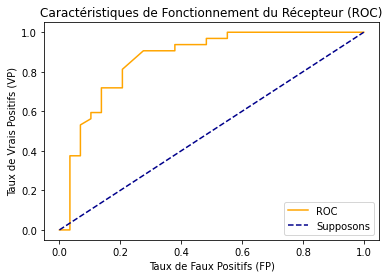

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_roc_curve(fp,vp):
    
    """
        Traçons une courbe ROC des Faux Positifs (FP)
        et des Vrais Positifs (VP)

    """
    
    # Traçons la courbe
    plt.plot(fp, vp, color="orange", label="ROC")
    
    # Nous allons tracer un graphique sans pouvoir prédictif (une ligne de base)
    # Nous pouvons notre modèle à un modèle arbitraire qui ne prédit rien
    
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Supposons")
    
    # Personnalisons notre graphique
    plt.xlabel("Taux de Faux Positifs (FP)")
    plt.ylabel("Taux de Vrais Positifs (VP)")
    plt.title("Caractéristiques de Fonctionnement du Récepteur (ROC)")
    plt.legend()

plot_roc_curve(fp,vp)
    

In [108]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

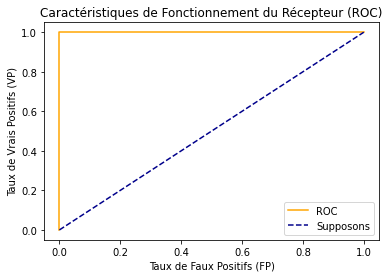

In [109]:
# Une courbe ROC parfaite

fp, vp, seuils = roc_curve(y_test, y_test)
plot_roc_curve(fp,vp)


In [110]:
roc_auc_score(y_test, y_test)

1.0

**En un mot, ce que l'on doit retenir, c'est :**

Les courbes ROC et les métriques AUC sont des métriques d'évaluation pour les modèles de classification binaire (un modèle qui prédit une chose ou une autre, comme une maladie cardiaque ou non).

La courbe ROC compare le taux de vrais positifs (tpr) par rapport au taux de faux positifs (fpr) à différents seuils de classification.

La métrique AUC vous indique dans quelle mesure votre modèle est capable de choisir entre les classes (par exemple, dans quelle mesure il est capable de décider si quelqu'un a une maladie cardiaque ou non). Un modèle parfait obtiendra un score AUC de 1.

 **Matrice de Confusion**

Moyen rapide de comparer les étiquettes qu'un modèle prédit et les vraies étiquettes qu'il était censé prédire.


In [111]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [112]:
# Visualisons notre matrice avec pd.crosstab()

pd.crosstab(y_test, y_preds, rownames=["Vraies Étiquettes"], colnames=["Étiquettes Prédites"])


Étiquettes Prédites,0,1
Vraies Étiquettes,,
0,23,6
1,6,26


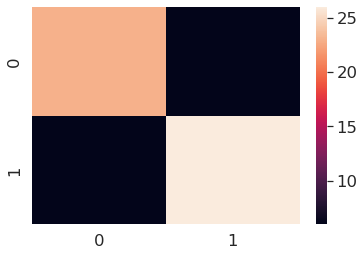

In [113]:
# Construisons une matrice plus claire avec Seaborn's heatmap() (graphique rectangulaire de données)

import seaborn as sns

# Ajustons l'échelle

sns.set(font_scale=1.5)

# Créons la matrice de confusion

mat_conf = confusion_matrix(y_test, y_preds)

# Construisons le graphique avec Seaborn
sns.heatmap(mat_conf);

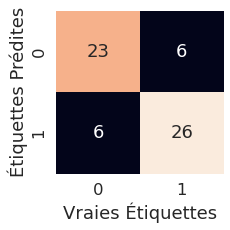

In [114]:
# Si nous voulions tracer la matrice plusieurs fois, il serait bien de le mettre dans une fonction

def plot_conf_mat(mat_conf):
    
    """
    Traçons la matrice de confusion à l'aide de Seaborn heatmap()
    """
    
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(mat_conf, annot=True, cbar=False)
    
    plt.xlabel("Vraies Étiquettes")
    plt.ylabel("Étiquettes Prédites");
    
plot_conf_mat(mat_conf)

##### **Rapport de Classification** : est aussi une collection de différentes mesures d'évaluation plutôt qu'une seule.
Il rapporte un certain nombre de paramètre qui vont évaluer notre modèle de classification

***Critères de Performance : ***

* Le Rappel ("recall"  en anglais), ou sensibilité ("sensitivity" en anglais), est le taux de vrais positifs, c’est à dire la proportion de positifs que l’on a correctement identifiés. C’est la capacité de notre modèle à détecter un patient malade. (Rappel = TP / TP+FN)

* La Précision, c’est-à-dire la proportion de prédictions correctes parmi les points que l’on a prédits positifs. C’est la capacité de notre modèle à signaler que pour un vrai patient malade. (Précision = TP / TP + FP)

* Pour évaluer un compromis entre rappel et précision, on peut calculer la "F-mesure", qui est leur moyenne harmonique. (F-score = 2 x (Rap x Pre / Rap + Pre))

* La Spécificité ("specificity" en anglais), qui est le taux de vrais négatifs, autrement dit la capacité à détecter toutes les  situations où il n’y a pas de maladie. C’est une mesure complémentaire de la sensibilité.  (Speficité = TN / TN + FP) 



In [115]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



 ### 4.2.2 Métriques d'évaluation pour les problèmes de Régression
 
 Nous allons examiner 3 différentes métriques qui sont les plus courantes : 
 
 1. Le R^2 (R au carré) ou coefficient de détermination
 2. Erreur Absolue Moyenne (MAE)
 3. Erreur Quadratique Moyenne  (MSE)
 
 **R^2** : compare  les prédictions de vos modèles à la moyenne des cibles. La valeur peut varier de - l'infini
 à 1 . 

In [116]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train);

In [117]:
model.score(X_test, y_test)

0.8654448653350507

In [118]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())

In [119]:
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [120]:
r2_score(y_test_mean, y_test)

0.0

In [121]:
r2_score(y_test, y_test)

1.0

**MAE** : moyenne des différences entre les valeurs prédites et les valeurs réelles .

In [122]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [123]:
df = pd.DataFrame(data={"valeurs réelles" : y_test, "valeurs prédites" : y_preds})
df

,valeurs réelles,valeurs prédites
173,23.6,23.081
274,32.4,30.574
491,13.6,16.759
72,22.8,23.460
452,16.1,16.893
...,...,...
412,17.9,13.159
436,9.6,12.476
411,17.2,13.612
86,22.5,20.205


In [124]:
df["differences"] = df["valeurs prédites"] - df["valeurs réelles"]
df

,valeurs réelles,valeurs prédites,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


**MSE**

In [125]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [126]:
# Calculons le MSE à la main

squared = np.square(df["differences"])
squared.mean()

9.867437068627439

### Résumé : 

Évaluer les résultats d'un modèle d'apprentissage automatique est aussi important que d'en créer un.

Mais tout comme les différents problèmes ont différents modèles d'apprentissage automatique, différents modèles d'apprentissage automatique ont des métriques d'évaluation différentes.

Vous trouverez ci-dessous quelques-unes des métriques d'évaluation les plus importantes que vous voudrez examiner pour les modèles de classification et de régression.

**Métriques/techniques d'évaluation du modèle de classification : **

* Score - Le score du modèle sous forme décimale. La précision parfaite est égale à 1,0.

* Précision - Indique la proportion d'identifications positives (le modèle a prédit la classe 1) qui étaient réellement correctes. Un modèle qui ne produit pas de faux positifs a une précision de 1,0.

* Rappel - Indique la proportion de positifs réels qui ont été correctement classés. Un modèle qui ne produit pas de faux négatifs a un rappel de 1,0.

* Score F1 - Une combinaison de précision et de rappel. Un modèle parfait obtient un score F1 de 1,0.

* Matrice de confusion - Compare les valeurs prédites avec les vraies valeurs de manière tabulaire, si 100% correctes, toutes les valeurs de la matrice seront de haut en bas à droite (ligne diagonale).

* Validation croisée - Divise votre ensemble de données en plusieurs parties et entraîne et teste votre modèle sur chaque partie, puis évalue les performances en moyenne.

* Rapport de classification - Sklearn a une fonction intégrée appelée classification_report() qui renvoie certaines des principales métriques de classification telles que la précision, le rappel et le score f1.

* Courbe ROC - Également connue sous le nom de caractéristique de fonctionnement du récepteur, il s'agit d'un tracé du taux de vrais positifs par rapport au taux de faux positifs.

* Score de la zone sous la courbe (AUC) - La zone sous la courbe ROC. Un modèle parfait atteint un score AUC de 1,0.

**Quelle métrique de classification devriez-vous utiliser ?**

La précision est une bonne mesure pour commencer si toutes les classes sont équilibrées (par exemple la même quantité d'échantillons qui sont étiquetés avec 0 ou 1).

**La précision et le rappel deviennent plus importants lorsque les classes sont déséquilibrées.**

    Si les prédictions faussement positives sont pires que les fausses négatives, visez une précision plus élevée.

    Si les prédictions faussement négatives sont pires que les faux positifs, visez un rappel plus élevé.

Le score F1 est une combinaison de précision et de rappel.

**Une matrice de confusion est toujours un bon moyen de visualiser l'évolution d'un modèle de classification.**

**Métriques/techniques d'évaluation du modèle de régression : **

* R^2 (prononcé r au carré) ou le coefficient de détermination - Compare les prédictions de votre modèle à la moyenne des cibles. Les valeurs peuvent aller de l'infini négatif (un très mauvais modèle) à 1. Par exemple, si votre modèle ne fait que prédire la moyenne des cibles, sa valeur R^2 serait 0. Et si votre modèle prédit parfaitement une plage de nombres c'est la valeur R^2 serait 1.

* Erreur absolue moyenne (MAE) - La moyenne des différences absolues entre les prédictions et les valeurs réelles. Cela vous donne une idée à quel point vos prédictions étaient fausses.

* Erreur quadratique moyenne (MSE) - Les différences quadratiques moyennes entre les prédictions et les valeurs réelles. La quadrature des erreurs supprime les erreurs négatives. Il amplifie également les valeurs aberrantes (échantillons qui ont des erreurs plus importantes).

**Quelle métrique de régression devez-vous utiliser ?**

R2 est similaire à la précision. Cela vous donne une indication rapide de la performance de votre modèle. En règle générale, plus votre valeur R2 est proche de 1,0, meilleur est le modèle. Mais cela ne dit pas vraiment à quel point votre modèle est erroné en termes de distance de chaque prédiction.

MAE donne une meilleure indication de la distance moyenne de chacune des prédictions de votre modèle.

Quant à la MAE ou MSE, en raison de la façon dont la MSE est calculée, mettant au carré les différences entre les valeurs prédites et les valeurs réelles, elle amplifie les différences plus importantes. Disons que nous prédisons la valeur des maisons (ce que nous sommes).

Faites plus attention au MAE : lorsqu'une remise de 10 000 $ est deux fois plus mauvaise qu'une remise de 5 000 $.

Faites plus attention au MSE : lorsqu'une remise de 10 000 $ est plus de deux fois plus mauvaise qu'une remise de 5 000 $.

### 4.2.3 On vas finalement utiliser le Paramètre "scoring"

In [127]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [128]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [129]:
# Score de la validation croisée
print(f"Score de la validation croisée {np.mean(cv_acc) * 100 :.2f}%")

Score de la validation croisée 82.48%


In [130]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, scoring="accuracy")
print(f"Score de la validation croisée {np.mean(cv_acc) * 100 :.2f}%")

Score de la validation croisée 82.48%


In [131]:
cv_precision = cross_val_score(clf, X, y, scoring="precision")
np.mean(cv_precision)

0.8085601538512754

In [132]:
cv_recall = cross_val_score(clf, X, y, scoring="recall")
np.mean(cv_recall)

0.8424242424242424

In [133]:
cv_f1 = cross_val_score(clf, X, y, scoring="f1")
np.mean(cv_f1)

0.841476533416832

Avec un modèle de regression ?

In [134]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

model = RandomForestRegressor()

In [135]:
np.random.seed(42)

cv_r2 = cross_val_score(model, X, y, scoring=None)
np.mean(cv_r2)

0.6243870737930857

In [136]:
np.random.seed(42)

cv_r2 = cross_val_score(model, X, y, scoring="r2")
np.mean(cv_r2)

0.6243870737930857

In [137]:
np.random.seed(42)

cv_mae = cross_val_score(model, X, y, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-3.0312352552902335

In [138]:
np.random.seed(42)

cv_mse = cross_val_score(model, X, y, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-21.261442856882137

## 4.3 Utilisons différentes métriques avec les fonctions scikit-learn

**Fonctions d'évaluation des modèles de Classification**

In [139]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier()

clf.fit(X_train, y_train)

# Effectuons des prédictions
y_preds = clf.predict(X_test)

# Évaluons notre modèle

print("Métrique d'évaluation du modèle de classification sur les données de test : ")
print(f"Score : {accuracy_score(y_test, y_preds) * 100 : .2f} %")
print(f"Rappel : {recall_score(y_test, y_preds) * 100 : .2f}%")
print(f"Précision : {precision_score(y_test, y_preds) * 100 : .2f}%")
print(f"F1-score : {f1_score(y_test, y_preds) *100 : .2f}%")

Métrique d'évaluation du modèle de classification sur les données de test : 
Score :  85.25 %
Rappel :  87.50%
Précision :  84.85%
F1-score :  86.15%


**Fonctions d'évaluation des modèles de Régression**

In [140]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor()

model.fit(X_train, y_train)

# Effectuons des prédictions
y_preds = model.predict(X_test)

# Évaluons notre modèle

print("Métrique d'évaluation du modèle de régression sur les données de test : ")
print(f"R au carré : {r2_score(y_test, y_preds) * 100 : .2f} %")
print(f"Erreur Moyenne Absolue : {mean_absolute_error(y_test, y_preds)}")
print(f"Erreur Quadratique Moyenne : {mean_squared_error(y_test, y_preds)}")


Métrique d'évaluation du modèle de régression sur les données de test : 
R au carré :  86.54 %
Erreur Moyenne Absolue : 2.136382352941176
Erreur Quadratique Moyenne : 9.867437068627442


# 5. Amélioration du Modèle

Les premières prédictions sont appelés prédictions de base.
Le premier modèle est appelé modèle de base. 

2 façons principales d'amèliorer nos modèles et prédictions : 
* Pourrions nous collecter plus de données ? (plus de données, mieux c'est)
* Pouvons nous amèliorer nos données maintenant ?

Du point de vue du modèle, nous allons nous poser des questions : 
* Y'a t'il un meilleur modèle que nous pourrions utiliser ?
* Pouvons nous améliorer notre modèle présent ?

* Parmètres : le modèle en trouve dans le jeu de données
* HyperParamètres : des réglages du modèle ML choisi afin de l'ajuster/l'améliorer 

Tois façons d'ajuster nos hyperpramètres : 

1. À la main
2. Aléatoire avec la méthode de sklearn RandomizedSearchCV
3. Éxhaustive avec GridSearchCV

In [141]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [142]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Ajuster les hyperparamètres à la main

Construisons nos trois datasets : Formation(Entrainement), Validation, Test

In [143]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Nous allons essayer d'ajuster les hyperparamètres : 

* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [144]:
 def evaluate_preds(y_true,  y_preds):
        
    """
    Comparaison entre les vraies étiquettes et celles prédites sur un modèle
    de classification .
    """
            
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    metric_dict = {"accuracy" : round(accuracy, 2), "precision" : round(precision, 2), 
                   "recall" : round(recall, 2), "f1_score" : round(f1, 2)}
    
    print(f"Score : {accuracy * 100 : .2f}%")
    print(f"Precision : {precision : .2f}") 
    print(f"Recall : {recall : .2f}")
    print(f"Score F1 : {f1:.2f}")
    
    return metric_dict

In [145]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

heart_disease_shuffled = heart_disease.sample(frac=1)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Divisons nos données en trois ensembles à savoir : formation, validation et test

train_split = round(0.7 * len(heart_disease_shuffled)) # 70% du dataset
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))# 15% du dataset


X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

#Prédictions de base
y_preds = clf.predict(X_valid) # On vas prédire sur nos données de validation car nous allons y revenir pour ajuster notre modèle

# Évaluons notre modèle sur l'ensemble de validation

baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics


Score :  82.22%
Precision :  0.81
Recall :  0.88
Score F1 : 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1_score': 0.85}

In [146]:
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [147]:
np.random.seed(42)

# Nous allons créer un de deuxième modèle de classification avec des hyperparamètres différents

clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Faisons des prédictions aec des hyperparamètres différents

y_preds2 = clf_2.predict(X_test)

# Passons à l'évaluation de nos prédictions

baseline_metrics2 = evaluate_preds(y_test, y_preds2)
baseline_metrics2

Score :  83.61%
Precision :  0.84
Recall :  0.84
Score F1 : 0.84


{'accuracy': 0.84, 'precision': 0.84, 'recall': 0.84, 'f1_score': 0.84}

### 5.2 Ajustons les hyperparamètres avec RandomizedSerachCV()

In [148]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators" : [10,100,200,500,1000,2000], "max_depth" : [None,5,10,20,30],
       "max_features" : ["auto", "sqrt"], "min_samples_split" : [2,4,6], "min_samples_leaf" : [1,2,4]}



clf = RandomForestClassifier(n_jobs=1)


# n_iter : — Spécifie le nombre de combinaisons d'hyperparamètres à sélectionner de manière aléatoire. 
# En effet, la recherche aléatoire ne vérifie pas toutes les combinaisons d'hyperparamètres définies 
# dans l'espace de recherche. Au lieu de cela, il ne considère qu'un échantillon aléatoire de combinaisons.
# Ici, n_iter=10 signifie qu'il charge un échantillon aléatoire de taille 10 qui contient 
# 10 combinaisons d'hyperparamètres différentes. Par conséquent, la recherche aléatoire ne 
# forme que 10 modèles différents 

rs_clf = RandomizedSearchCV(estimator=clf, param_distributions=grid, n_iter=10, #nombre de modèles essayés
                               cv=5, random_state=42, verbose=2, refit=True)

# Entrainons notre modèle

# Notre algo RandomSearchCV va déterminer quelle combinaison d'hyperparamètres est la meilleure avec 10 modèles
# différents

rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimato

In [149]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [150]:
# Faisons des prédictions avec nos meilleurs paramètres

rs_y_preds = rs_clf.predict(X_test)

# Évaluons nos prédictions

rs_metrics = evaluate_preds(y_test, rs_y_preds)
rs_metrics

Score :  86.89%
Precision :  0.85
Recall :  0.91
Score F1 : 0.88


{'accuracy': 0.87, 'precision': 0.85, 'recall': 0.91, 'f1_score': 0.88}

### 5.3 Réglage des Hyperparamètres avec GridSearchCV

In [151]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 2000],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [152]:
# Nous pouvons réduire l'espace de recherche en réduisant les hyperparamètres

grid2  = {"n_estimators" : [10,100,200], "max_depth" : [30],
       "max_features" : ["auto", "sqrt"], "min_samples_split" : [4], "min_samples_leaf" : [1,2]}

In [153]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)


X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

# Setup th GridSearchCV()

gs_clf = GridSearchCV(estimator=clf, param_grid=grid2,
                               cv=5, verbose=2, refit=True)


# Entrainons notre modèle



gs_clf.fit(X_train, y_train);


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; tot

In [154]:
gs_clf.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [155]:
# Faisons des prédictions avec nos meilleurs paramètres

gs_y_preds = gs_clf.predict(X_test)

# Évaluons nos prédictions

gs_metrics = evaluate_preds(y_test, gs_y_preds)
gs_metrics

Score :  80.33%
Precision :  0.75
Recall :  0.86
Score F1 : 0.80


{'accuracy': 0.8, 'precision': 0.75, 'recall': 0.86, 'f1_score': 0.8}

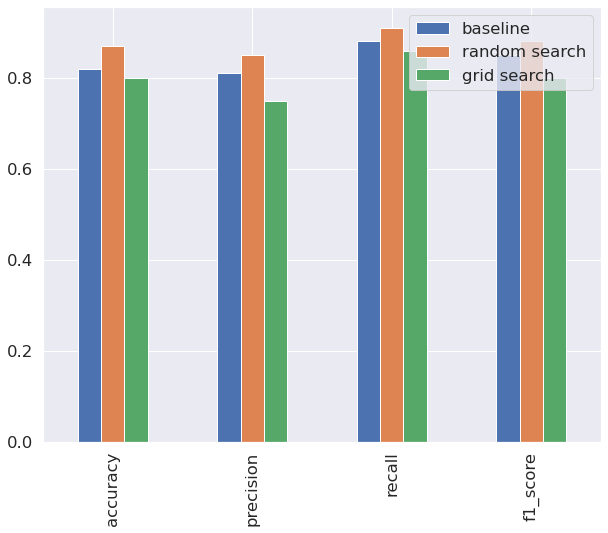

In [156]:
# Comparons nos métriques 

compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                
                               "random search" : rs_metrics, 
                               "grid search" : gs_metrics})

compare_metrics.plot.bar(figsize=(10,8));

## 6. Sauvegarder et Charger nos modèles d'apprentissage automatique

Deux façons de sauvegarder nos modèles ML : 

* Avec le module Pickle
* Avec le module joblib

In [157]:
import pickle

# Sauvegardons un modèle existant en un fichier

pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [158]:
# Charger un modèle sauvegardé

loaded_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [159]:
# On vas faire quelques prédictions
pickle_y_preds = loaded_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Score :  80.33%
Precision :  0.75
Recall :  0.86
Score F1 : 0.80


{'accuracy': 0.8, 'precision': 0.75, 'recall': 0.86, 'f1_score': 0.8}

In [160]:
from joblib import dump, load

# Sauvegarder notre modèle dans un fichier

dump(gs_clf, filename="gs_random_forest_model_2.joblib")

['gs_random_forest_model_2.joblib']

In [161]:
# Importe un modèle sauvegardé

loaded_job_model = load(filename="gs_random_forest_model_2.joblib")

In [162]:
job_y_preds = loaded_job_model.predict(X_test)
evaluate_preds(y_test, job_y_preds)

Score :  80.33%
Precision :  0.75
Recall :  0.86
Score F1 : 0.80


{'accuracy': 0.8, 'precision': 0.75, 'recall': 0.86, 'f1_score': 0.8}

## 7. Bordel enfin la dernière Partie

In [163]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [164]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [165]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Les étapes que nous voulons mettre dans une cellule : 
1. Remplir nos données manquantes
2. Transformer nos données en données numériques
3. Construire un model sur nos données

In [166]:
# Préparation des données

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelisation

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Fixons notre graine aléatoire
import numpy as np
np.random.seed(42)

# Importons notre dataset et supprimons les valeurs manquantes
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Déffinition de différentes fonctionnalités et de transformateurs du pipeline

categorical_features = ["Make", "Colour"]

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("oneHot", OneHotEncoder(handle_unknown="ignore"))  # Lorsque ce paramètre
                                                        # est défini sur « ignore » et une 
                                                        # catégorie inconnue est rencontrée pendant
                                                        # transform, les colonnes encodées one-hot résultantes 
                                                        # pour cette fonctionnalité
                                                        # seront tous des zéros.
])

door_features = ["Doors"]

door_transformer  = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]

numeric_transformer = Pipeline(steps=[( 
    "imputer", SimpleImputer(strategy="mean"))
])

# Mise en place des étapes de pré-traitement (remplissons les valeurs manquantes et convertissons les en chiffres)
# Prétraitement
preprocessor = ColumnTransformer(transformers=[
    ("cat", categorical_transformer, categorical_features),
    ("door", door_transformer, door_features),
    ("num", numeric_transformer, num_features)
])

# Création d'un pipeline de prétraitement et de modélisation ##
model = Pipeline(steps=[("preprocessor", preprocessor),       #
                         ("model", RandomForestRegressor())   #
                         ])                                   #
###############################################################

# Divisons nos données

X = data.drop("Price", axis=1)
y = data["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Entrainons et Évaluons le modèle

model.fit(X_train, y_train)
model.score(X_test, y_test)

# La classe de pipeline scikit-learn est un outil utile pour encapsuler plusieurs transformateurs 
# différents à côté d' un estimateur en un seul objet, de sorte que vous suffit d'appeler 
# vos méthodes importantes une fois ( fit() , predict() , etc.).

# Dans la plupart des projets de Machine Learning, le jeu de données utilisé pour calibrer le modèle 
# doit subir toute une série de transformations. Encodage de variables catégorielles, de la normalisation, 
# du feature scaling et autres techniques spécifiques.

# Cependant, cette série de transformations doit être appliquée plus d'une fois. D'une part, 
# au moment où il faut entraîner le modèle, et d'autre part lorsqu'il faut obtenir une prédiction 
# pour de nouvelles données. Comment ne pas mélanger les différentes étapes et garantir un traitement 
# consistant entre ces deux étapes ? C'est tout l'intérêt des pipelines de scikit-learn.

# - Toutes les opérations de transformations vont être centralisées dans le pipeline.
# - Il sera plus facile d'intégrer ce pipelines à plusieurs endroits dans le code source.
# - Il est modulable et peut ponctuellement être modifié.
# - La gestion des versions du pipeline sera plus simple.



0.22188417408787875

Il est possible d'utiliser RandomSearchCV() et GridSearchCV() dans un Pipeline

In [167]:
# Utilisons GridSearchCV() dans notre Pipeline de régression

from sklearn.model_selection import GridSearchCV

pipe_grid = {
    
    "preprocessor__num__imputer__strategy" : ["mean", "median"], 
    "model__n_estimators" : [100,1000],
    "model__max_depth" : [None, 5],
    "model__max_features" : ["auto"],
    "model__min_samples_split" : [2,4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strat

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('oneHot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [168]:
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'model', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__cat', 'preprocessor__door', 'preprocessor__num', 'preprocessor__cat__memory', 'preprocessor__cat__steps', 'preprocessor__cat__verbose', 'preprocessor__cat__imputer', 'preprocessor__cat__oneHot', 'preprocessor__cat__imputer__add_indicator', 'preprocessor__cat__imputer__copy', 'preprocessor__cat__imputer__fill_value', 'preprocessor__cat__imputer__missing_values', 'preprocessor__cat__imputer__strategy', 'preprocessor__cat__imputer__verbose', 'preprocessor__cat__oneHot__categories', 'preprocessor__cat__oneHot__drop', 'preprocessor__cat__oneHot__dtype', 'preprocessor__cat__oneHot__handle_unknown', 'preprocessor__cat__oneHot__sparse', 'preprocessor__door__memory', 'preprocessor__door__steps', 'preprocessor__door__verbose', 'preprocessor__

In [169]:
gs_model.score(X_test, y_test)

0.3339554263158365